# Практическая работа №5 по теории вероятностей
Задание: *Каждый студент получает выборку из 20 чисел. Необходимо определить следующие статистические 
характеристики: вариационный ряд, экстремальные значения и размах, оценки математического ожидания и среднеквадратического отклонения, эмпирическую функцию распределения и её график, гистограмму и полигон приведенных частот группированной выборки. Для расчета характеристик и построения графиков нужно написать программу на одном из языков программирования. Листинг программы и результаты работы должны быть представлены в отчете по практической работе.*

Вариант 21: `(6,16) — (6,20), (7,16) — (7,20)`

Используемые модули Python

In [1]:
import numpy as np
from tabulate import tabulate
from collections import Counter
import matplotlib.pyplot as plt
import math

## Ввод данных

In [2]:
ввод_выборки = """
 0.90, -0.24,  0.55, -1.45,  0.17, 
-1.00,  0.62, -1.45, -0.52, -1.31,

-0.76, -0.55, -0.62,  0.21, -1.31,
-1.14,  1.07, -0.14, -1.45,  1.45 
"""

sampling = np.array(tuple(map(lambda s: float(s.strip(",")), ввод_выборки.strip().split())))
print("Выборка:")
print(tabulate([[i] for i in sampling], headers=["X"]))

Выборка:
    X
-----
 0.9
-0.24
 0.55
-1.45
 0.17
-1
 0.62
-1.45
-0.52
-1.31
-0.76
-0.55
-0.62
 0.21
-1.31
-1.14
 1.07
-0.14
-1.45
 1.45


## Статистические характеристики выборки

In [3]:
sampling_min = sampling.min()
sampling_max = sampling.max()
sampling_range = sampling_max - sampling_min
sampling_mean = sampling.mean()
sampling_varience = np.var(sampling, ddof=1)

print(f"""
Максимальное значение в выборке:    {sampling_max:.3}
Минимальное значение в выборке:     {sampling_min:.3}
Размах значений выборки:            {sampling_range:.3}
Оценка математического ожидания:    {sampling_mean:.3}
Оценка исправленного СКО:           {sampling_varience:.3}
""")


Максимальное значение в выборке:    1.45
Минимальное значение в выборке:     -1.45
Размах значений выборки:            2.9
Оценка математического ожидания:    -0.348
Оценка исправленного СКО:           0.844



### Вариационный ряд

In [4]:
destribution = Counter(sampling)

series = [[
    i, 
    destribution[i], 
    destribution[i] / len(sampling)
] for i in np.unique(sampling)]

print("Вариационный ряд:")
print(tabulate(series, headers=["X", "#X", "P(X)"]))

Вариационный ряд:
    X    #X    P(X)
-----  ----  ------
-1.45     3    0.15
-1.31     2    0.1
-1.14     1    0.05
-1        1    0.05
-0.76     1    0.05
-0.62     1    0.05
-0.55     1    0.05
-0.52     1    0.05
-0.24     1    0.05
-0.14     1    0.05
 0.17     1    0.05
 0.21     1    0.05
 0.55     1    0.05
 0.62     1    0.05
 0.9      1    0.05
 1.07     1    0.05
 1.45     1    0.05


### Гистограмма группированной *выборки*

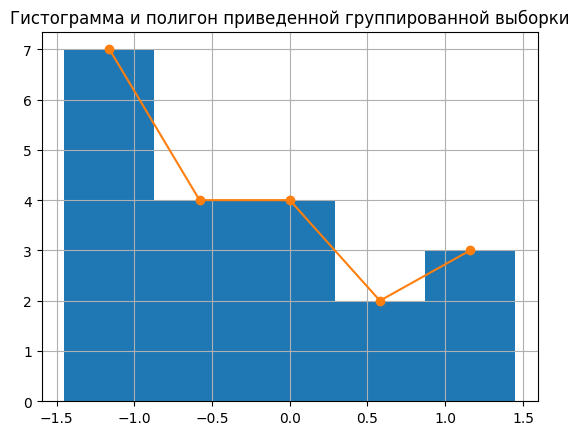

In [5]:
N = (1 + math.floor(math.log2(len(sampling))))
counts, bins = np.histogram(sampling, bins=N)
h = sampling_range / N

plt.title("Гистограмма и полигон приведенной группированной выборки")
plt.stairs(counts,  bins, fill=True)
plt.plot(bins[:-1] + h/2, counts, marker="o")
plt.grid()
plt.show()

### Эмпирическая функция

In [6]:
ef: list[tuple] = [None] * (1 + len(series)) # empiric function
ef[0] = (float("-inf"), series[0][0], 0.0)
ef[-1] = (series[-1][0], float("+inf"), 1.0)

_cum_sum = 0
for i in range(len(series)-1):
    _cum_sum += series[i][2]
    ef[i+1] = (series[i][0], series[i+1][0], _cum_sum)

print("Эмпирическая функция':")
print(tabulate(ef, headers=["a", "b", "P(a < X ⩽ b)"]))

Эмпирическая функция':
      a       b    P(a < X ⩽ b)
-------  ------  --------------
-inf      -1.45            0
  -1.45   -1.31            0.15
  -1.31   -1.14            0.25
  -1.14   -1               0.3
  -1      -0.76            0.35
  -0.76   -0.62            0.4
  -0.62   -0.55            0.45
  -0.55   -0.52            0.5
  -0.52   -0.24            0.55
  -0.24   -0.14            0.6
  -0.14    0.17            0.65
   0.17    0.21            0.7
   0.21    0.55            0.75
   0.55    0.62            0.8
   0.62    0.9             0.85
   0.9     1.07            0.9
   1.07    1.45            0.95
   1.45  inf               1


#### График эмпирической функции

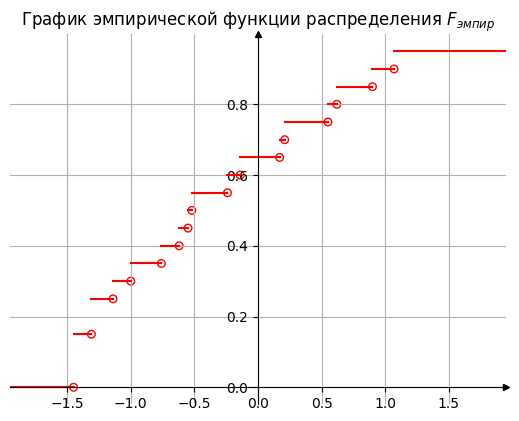

In [7]:
plt.title("График эмпирической функции распределения $F_{эмпир}$")
axes = plt.gca()
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.spines['left'].set_position('zero')
axes.spines['bottom'].set_position('zero')
axes.plot(1, 0, marker=">", ms=5, color='k', transform=axes.get_yaxis_transform(), clip_on=False)
axes.plot(0, 1, marker="^", ms=5, color='k', transform=axes.get_xaxis_transform(), clip_on=False)

plt.grid()
plt.xlim(ef[0][1] - 0.5, ef[-1][0] + 0.5)

plt.plot([ef[0][1] - 0.5, ef[0][1]], [ef[0][2] , ef[0][2]], color='r')

for i in range(1,len(ef)-1):
    plt.plot([ef[i][0], ef[i][1]], [ef[i][2] , ef[i][2]], color='r')
    axes.scatter(ef[i-1][1], ef[i-1][2], s=30, facecolors='none', edgecolors='r')

plt.plot([ef[-1][0] + 0.5, ef[-1][0]], [ef[-2][2] , ef[-2][2]], color='r')

plt.show()